<a href="https://colab.research.google.com/github/mehtasaurav/Drift-Detection-and-Adaptation-VIT-University/blob/main/ConceptDrift_Detection_XgBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Counting the total number of concept drifts on various(10,20,30%) induced noise levels on XGboost model.


In [ ]:
 X = df.iloc[:, :-1] # Select all columns except the last one
 y = df.iloc[:, -1] # Select the last column

 # Split train (70%) and test (30%)
 (
 X_train,
 X_test,
 y_train,
 y_test,
 ) = train_test_split(X, y, train_size=0.7,random_state=31)


In [ ]:
drift_size = int(y_test.shape[0] * 0.1) # 0.1 is 10%, 0.2 will be 20%
y_test_drift = y_test[-drift_size:]
modify_idx = np.random.rand(*y_test_drift.shape) <=0.5
y_test_drift[modify_idx] = (y_test_drift[modify_idx] + 1) % len(np.unique(y_test))
y_test[-drift_size:] = y_test_drift


In [ ]:
import xgboost as xgb
# Define and fit model
pipeline = Pipeline(
  [
    ("scaler", StandardScaler()),
   ("model", xgb.XGBClassifier()),

  ]
)
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# Initialize variables to store accuracy and sample count
accuracy_values = []
sample_count = []

 # Detector configuration and instantiation

config = DDMConfig(warning_level=2.0,
drift_level=3.0, min_num_instances=30)
detector = DDM(config=config)


In [ ]:
# Simulate data stream (assuming test label available after prediction)
X_test = np.array(X_test)
drift_count = 0
correct_predictions = 0 # Initialize variable to track correct predictions

for i, (X, y) in enumerate(zip(X_test, y_test)):
 y_pred = pipeline.predict(X.reshape(1, -1))
 correct_predictions += int(y_pred == y)
  # Calculate accuracy at each iteration
 accuracy = correct_predictions / (i + 1)

 # Append accuracy and sample count to respective lists
 accuracy_values.append(accuracy)
 sample_count.append(i + 1)

 error = 1 - int(y_pred == y)
 detector.update(value=error)
 status = detector.status
 if status["drift"]:
      drift_count += 1


Total Concept Drift Detected: 562


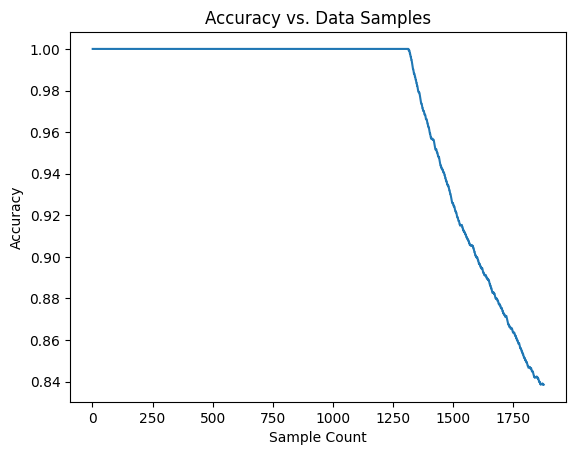

In [ ]:
print("Total Concept Drift Detected:", drift_count)

# Plotting the accuracy vs. sample count
plt.plot(sample_count, accuracy_values)
plt.xlabel("Sample Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Data Samples")
plt.show()